In [1]:
import tkinter as tk
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


In [5]:
data = pd.read_csv("datafiles/5_year_stock_weekly_20_02_2018.csv")
column_names = list(data.columns)
root = tk.Tk()
root.title("Regression Analysis")
root.geometry('900x500')
column_label = tk.Label(root, text="Select columns to graph:")
column_label.grid(row=0, column=0, padx=10, pady=10)
column_var = tk.StringVar(root, value=column_names[0])
column_listbox = tk.Listbox(root, selectmode=tk.MULTIPLE, listvariable=column_var, height=len(column_names))
column_listbox.grid(row=1, column=0, padx=10)
for column_name in column_names[1:]:
    column_listbox.insert(tk.END, column_name)

pre_proc_label = tk.Label(root, text="Select a pre_proc opt:")
pre_proc_label.grid(row=0, column=1, padx=10, pady=10)
pre_proc_opts = ["Normalization", "None"]
pre_proc_var = tk.StringVar(root)
pre_proc_var.set(pre_proc_opts[0])
pre_proc_dropdown = tk.OptionMenu(root, pre_proc_var, *pre_proc_opts)
pre_proc_dropdown.grid(row=1, column=1, padx=10)

regression_label = tk.Label(root, text="Select a regression option:")
regression_label.grid(row=0, column=2, padx=10, pady=10)
regression_options = ["linear_regression", "logistic_regression", "None"]
regression_var = tk.StringVar(root)
regression_var.set(regression_options[0])

regression_dropdown = tk.OptionMenu(root, regression_var, *regression_options)
regression_dropdown.grid(row=1, column=2, padx=10)




In [6]:



def preprocess_data(selected_cols, selected_pre_proc_option):
    pre_proc_data = data[selected_cols]
    if "Normalization" in selected_pre_proc_option:
        pre_proc_data = (pre_proc_data - pre_proc_data.mean()) / pre_proc_data.std()
    return pre_proc_data

def perform_linear_regression(x, y):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    equation = "y = {:.4f}x + {:.4f}".format(model.coef_[0][0], model.intercept_[0])
    r_squared = round(model.score(x, y), 2)
    return y_pred, equation, r_squared

def generate_plot_with_regression(pre_proc_data, selected_pre_proc_opt, reg_opt):
    fig, ax = plt.subplots()
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i, col in enumerate(pre_proc_data.columns):
        x = np.arange(len(pre_proc_data[col])).reshape((-1, 1))
        y = pre_proc_data[col].values.reshape((-1, 1))
        y_pred, equation, r_squared = perform_linear_regression(x, y)
        color = colors[i % len(colors)] # cycle through colors
        ax.plot(x, y_pred, linestyle='--', label=equation, color=color)
        ax.plot(x, y, label=col, color=color)
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Price")
    x_ticks = ax.get_xticks()
    start_date = datetime.strptime(data["Time_step"].iloc[0], "%d/%m/%Y")
    end_date = start_date + timedelta(weeks=len(data))
    x_tick_dates = [start_date + timedelta(weeks=int(x_tick)) for x_tick in x_ticks]
    x_tick_labels = [date.strftime("%d/%m/%Y") for date in x_tick_dates]
    ax.set_xticklabels(x_tick_labels)
    ax.set_xlim([0, len(data) + 12])
    ax.legend()
    plt.show()

def validate_input():
    column_name = column_var.get()
    regression_option = regression_var.get()
    pre_proc_option = pre_proc_var.get()
    selected_indices = column_listbox.curselection()
    selected_cols = [column_names[i] for i in selected_indices]
    pre_proc_data = preprocess_data(selected_cols, pre_proc_option)
    generate_plot_with_regression(pre_proc_data, pre_proc_option, regression_option)

submit_button = tk.Button(root, text="Submit", command=validate_input)
submit_button.grid(row=2, column=1, pady=10)


C:\Users\Raul\AppData\Local\Temp\ipykernel_6004\4076191984.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels)


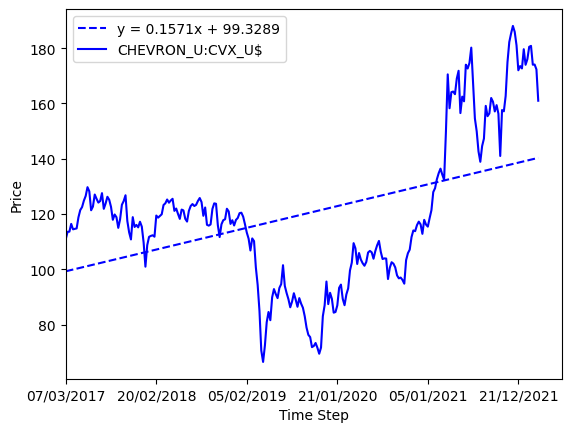

C:\Users\Raul\AppData\Local\Temp\ipykernel_6004\4076191984.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels)


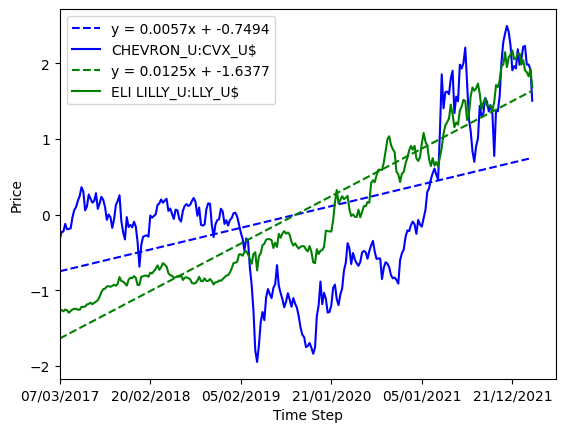

In [ ]:
root.mainloop() 